<a href="https://colab.research.google.com/github/Biswajitjitu6/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netfix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title - Netflix Movie and TV Shows Clustering**

**Project Type** - Unsupervised (Clustering, Content Based Recommendation System)

**Contribution** - Individual

**Name** - Biswajit Sahoo

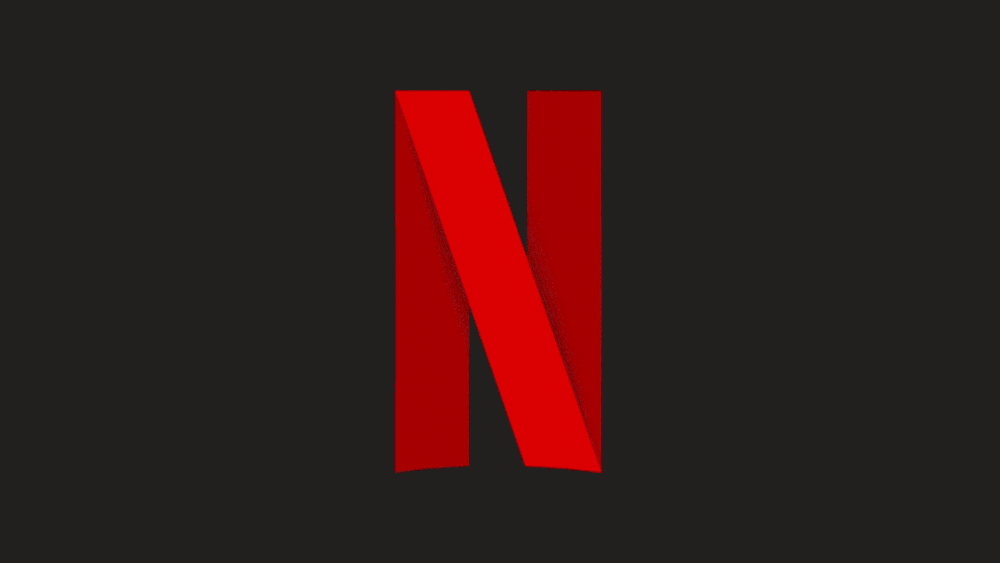

### **Project Summary**
This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

In this project, we worked on a text clustering problem where we had to classify/group the Netflix movie/shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

- The dataset contained about 7787 records, and 11 attributes.

- We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).

- Creating cluster using following attributes: director, cast, country, genre, rating and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

- We used Principal Component Analysis (PCA) to handle the curse of dimensionality.

- We built Two types of clusters using the K-Means Clustering and Agglomerative Heirachycal clustering algorithm and find out optimal number of clusters using diffrent technique such as elbow method, silhoutte score and dendogram etc.

- A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.

## **GitHub Link:**
https://github.com/Biswajitjitu6/Netflix-Movies-and-TV-Shows-Clustering/tree/main

### **Index**
1. Problem Statement
2. Importing the Libraries and the Dataset
3. Understanding Data
4. Exploratory Data Analysis
5. Data Cleaning
6. Textual Data Preprocessing
7. Clusters Impelementation
8. Recommendation System.
9. Conclusions

## **Let's Begin !**
## **1. Problem Statement**
**Netflix is the world's largest online streaming service provider, with over 220 million subscribers as of 2022-Q2. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber churn.**

**We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.**

**The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.**

## **2. Know Your Data**

## Import Libraries

In [ ]:
# library used for Analyzing and Visualization purpose
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# library used for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Almabetter Projects/Advanced Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
     

## Data Set First View

In [ ]:
# top 5 rows
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

## Size of dataset

In [ ]:
# Dataset Rows & Columns count
print(f'number of rows : {df.shape[0]}  \nnumber of columns : {df.shape[1]}')

number of rows : 7787  
number of columns : 12


## Unique values

In [ ]:

# unique values in each column
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## Missing Values/Null Values

In [ ]:
nan_check=pd.DataFrame({"No of Total Values":df.shape[0],"No of Nan Values":df.isnull().sum(),
                        "Percentage Of Nan Values": round((df.isnull().sum()/ df.shape[0])*100 , 2)})
nan_check.sort_values("No of Nan Values" , ascending = False)

No of Total Values  No of Nan Values  Percentage Of Nan Values
director                    7787              2389                     30.68
cast                        7787               718                      9.22
country                     7787               507                      6.51
date_added                  7787                10                      0.13
rating                      7787                 7                      0.09
show_id                     7787                 0                      0.00
type                        7787                 0                      0.00
title                       7787                 0                      0.00
release_year                7787                 0                      0.00
duration                    7787                 0                      0.00
listed_in                   7787                 0                      0.00
description                 7787                 0                      0.00

<AxesSubplot:>

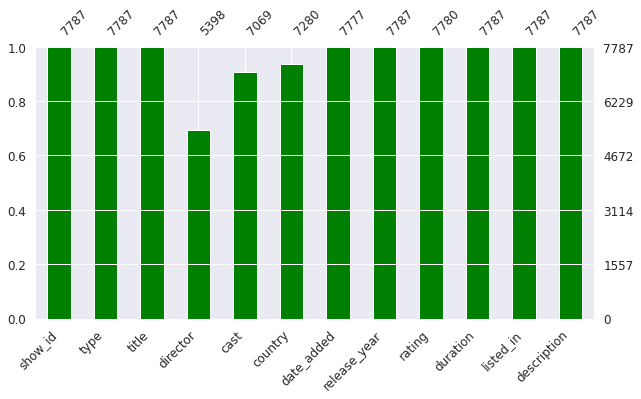

In [ ]:
import missingno as msno
msno.bar(df, figsize=(10,5), fontsize=12, color='green')

## **What You have done and what you have got from that ?**
- Imported the required librries
- The data set has 7787 records and 12 attributes
- This dataset contains missing value. The 'director' column has the highest missing values. i.e is more than 30%. 'Cast'and 'Country' has 9.2% and 6.5% of missing values and rating has 0.09 percentof missing values

## **3. Understanding Attributes**
**Attribute Names and Information**

- **show_id** : Unique ID for every Movie/Show
- **type** : Identifier - Movie/Show
- **title** : Title of the Movie/Show
- **director** : Director of the Movie/Show
- **cast** : Actors involved in the Movie/Show
- **country** : Country where the Movie/Show was produced
- **date_added** : Date it was added on Netflix
- **release_year** : Actual Release year of the Movie/Show
- **rating** : TV Rating of the Movie/Show
- **duration** : Total Duration - in minutes or number of seasons
- **listed_in** : Genre
- **description**: The Summary description

## Statistical Summary

In [ ]:

# Dataset Describe
df.describe(include='all').transpose()

count unique  \
show_id         7787   7787   
type            7787      2   
title           7787   7787   
director        5398   4049   
cast            7069   6831   
country         7280    681   
date_added      7777   1565   
release_year  7787.0    NaN   
rating          7780     14   
duration        7787    216   
listed_in       7787    492   
description     7787   7769   

                                                            top  freq  \
show_id                                                      s1     1   
type                                                      Movie  5377   
title                                                        3%     1   
director                                 Raúl Campos, Jan Suter    18   
cast                                         David Attenborough    18   
country                                           United States  2555   
date_added                                      January 1, 2020   118   
release_year                                                NaN   NaN   
rating                                                    TV-MA  2863   
duration                                               1 Season  1608   
listed_in                                         Documentaries   334   
description   Multiple women report their husbands as missin...     3   

                    mean       std     min     25%     50%     75%     max  
show_id              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
type                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
title                NaN       NaN     NaN     NaN     NaN     NaN     NaN  
director             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
cast                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
country              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
date_added           NaN       NaN     NaN     NaN     NaN     NaN     NaN  
release_year  2013.93258  8.757395  1925.0  2013.0  2017.0  2018.0  2021.0  
rating               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
duration             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
listed_in            NaN       NaN     NaN     NaN     NaN     NaN     NaN  
description          NaN       NaN     NaN     NaN     NaN     NaN     NaN

## **4. Data Vizualization, Storytelling & Experimenting with charts**

## **Chart-1:** Type

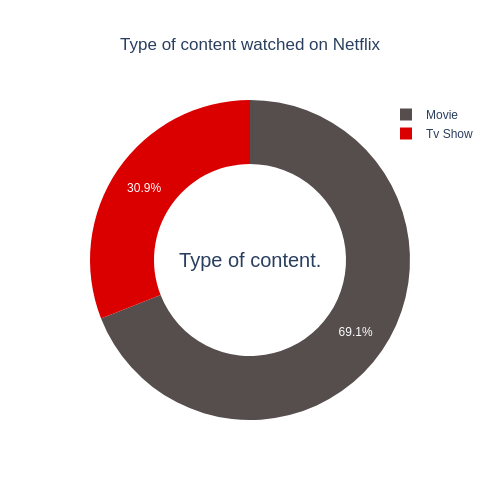

In [ ]:
# Create a pie chart for Type.
colors = ['	#db0000', '	#564d4d']
labels = ['Tv Show', 'Movie']
tv_show = df.type.value_counts()[1]
movie = df.type.value_counts()[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=[tv_show, movie], hole=.6)])
fig.update_layout(
    title_text="Type of content watched on Netflix",title_x=0.5, legend=dict(x=0.9),height=500, width=500,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Type of content.', font_size=20, showarrow=False)])
fig.update_traces(marker=dict(colors=colors))

fig.show('png')

**1. Why did you pick the specific chart?**
- Countplot show the frequency, counts of values for the different levels of a categorical or nominal variable.

- To show the count of interested and not-interested of policyholders , I have used Countplot.

**2. What is/are the insight(s) found from the chart?**
- Greater number of count belong from movie class than Tv show class.
- 69% of data belong from Movie class and 31% of data belong from TV shows

**3. Will the gained insights help creating a positive business impact?**

- Yes. It will. Because we can understand there is a production of Movies is more than TV show

## **Chart-2:** Title

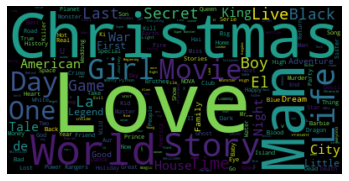

In [ ]:
# text documents
text = " ".join(word for word in df['title'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

**1. Why did you pick the specific chart?**
- A word cloud is a striking visualization method for highlighting essential textual data points. It can make dull data shine and deliver crucial information quickly.

**2. What is/are the insight(s) found from the chart?**
- Word like Christmas, Love, World, Man, Story are very comman word which are appear most of the time in movie title column.

**3. Will the gained insights help creating a positive business impact?**

- No. It will not impact as much.

## **Chart-3:** Director

In [ ]:
print(f'number of unique classes : {df.director.nunique()}')
print(f'counting null value : {df.director.isna().sum()}')

number of unique classes : 4049
counting null value : 2389


In [ ]:
print(f"number of movie directed by director is : { df[df['type']=='TV Show']['director'].value_counts().sum()}")
print(f"number of TV show directed by director is : { df[df['type']=='Movie']['director'].value_counts().sum()}")

number of movie directed by director is : 184
number of TV show directed by director is : 5214


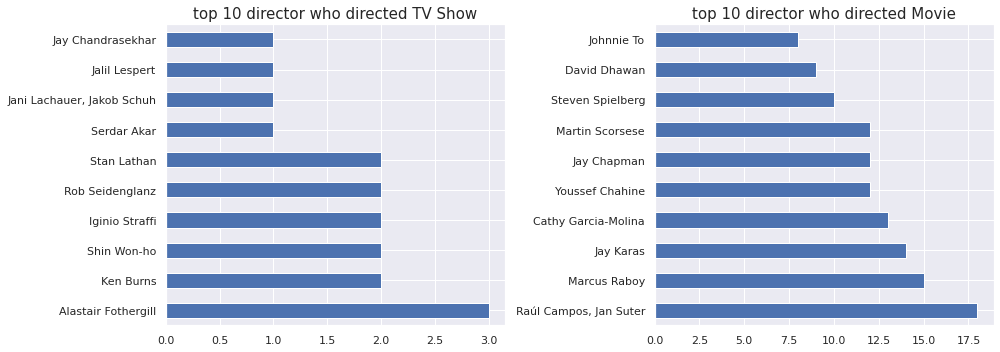

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# top 10 director who directed TV show
show = df[df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
show.set_title('top 10 director who directed TV Show', size=15)

# top 10 director who directed movie
movie = df[df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movie.set_title('top 10 director who directed Movie', size=15)

plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**
- To visualize  the top 10 director from TV show and from Movie.

**2. What is/are the insight(s) found from the chart?**
- Alstair Fothergill directed highest shows in datalist which is 3.
- Raul Campos and Jan Suter together have directed 18 movies, higher than anyone in the dataset.

**3. Will the gained insights help creating a positive business impact?**
- No. It will not impact.

## **Chart-4:** Cast

In [ ]:
cast = df['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()
cast

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
                    ..
Archie Alemania      1
Demore Barnes        1
Marty Adams          1
Nicole Boivin        1
Rachel Khoo          1
Length: 32881, dtype: int64

In [179]:
print(f"Number of Tv Shows actor: {len(df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts())}")
print(f"number of Movie actor : {len(df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts())}")

Number of Tv Shows actor: 13526
number of Movie actor : 23043


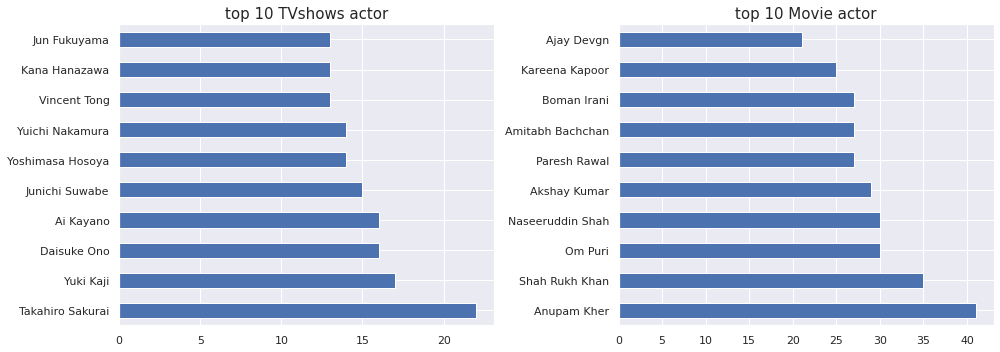

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
# plotting actor who appered highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('top 10 TVshows actor', size=15)

# seperating movie actor from cast column
top_movie_actor = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
# plotting actor who appered highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('top 10 Movie actor', size=15)

plt.tight_layout()
plt.show()


**1. Why did you pick the specific chart?**
- To visualize  the top 10 Actor according to TV show and according to Movie.

**2. What is/are the insight(s) found from the chart?**

- Anupam Kher, Shahrukh Khan, Om Puri play highest number of role in the movies.
- Takahiro Sakurai, Yuki Kaji, Daisuke Ono play highest role in the TV shows.

**3. Will the gained insights help creating a positive business impact?**
- No. It will not impact.

## **Chart-5:** Country

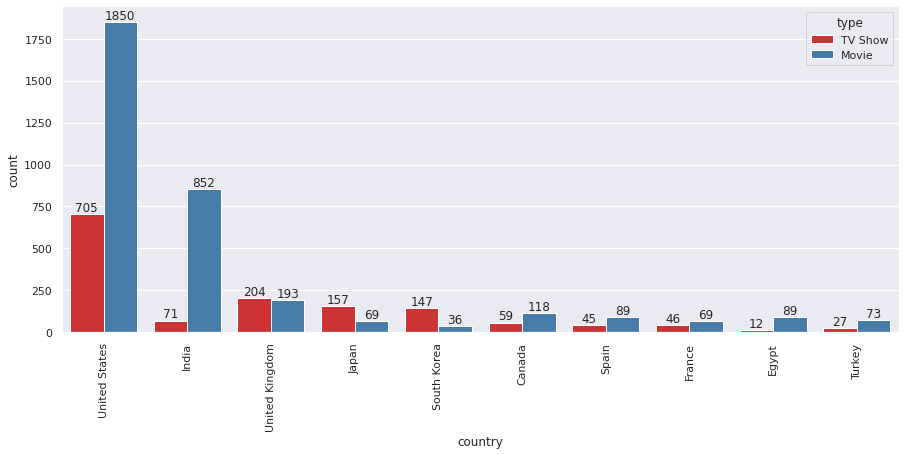

In [ ]:
plt.figure(figsize=(15,6))
sns.set(style="darkgrid")
ax = sns.countplot(data=df,x='country', y=None, hue="type", order=df['country'].value_counts().index[0:10], palette="Set1")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()



In [ ]:
# % share of movies / tv shows by top 10 countries
df['country'].value_counts().nlargest(10).sum()/len(df)*100

63.06664954411198


**1. Why did you pick the specific chart?**
- To visualize  the top 10 country that produce heighest number of TV shows and Movies.

**2. What is/are the insight(s) found from the chart?**

- The highest number of movies / TV shows were based out of the US, followed by India and UK.
- The top 10 countries together account for about 63% of all movies and TV shows in the dataset.

**3. Will the gained insights help creating a positive business impact?**
- Yes. It will impact. Because top countries generate more revenue from the movie and tv show industry

## **Chart-6:** Release Year

In [ ]:
print(f'oldest record of movie/show release year : {df.release_year.min()}')
print(f'latest record of movie/show release yesr : {df.release_year.max()}')

oldest record of movie/show release year : 1925
latest record of movie/show release yesr : 2021


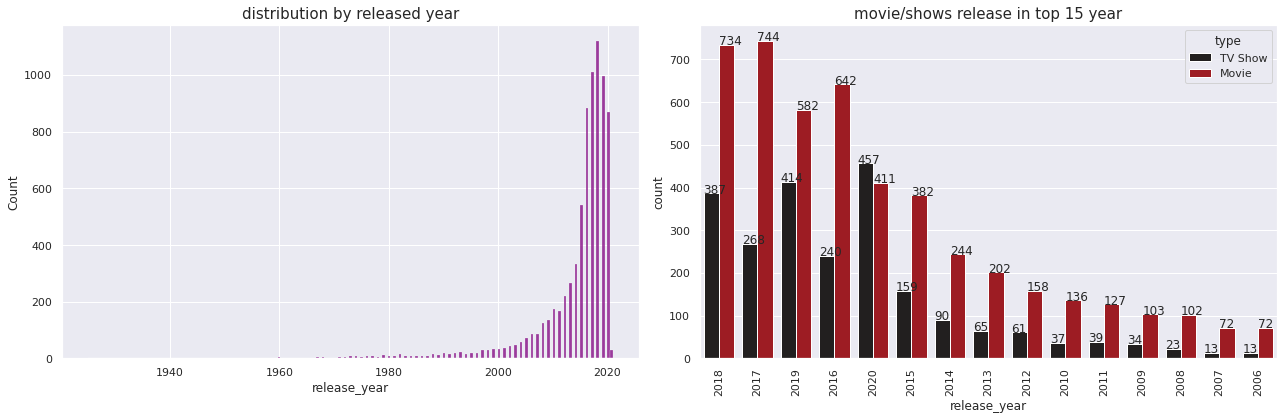

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(18,6))

# Univariate analysis
hist = sns.histplot(df['release_year'], ax=ax[0],palette="Set2", color='purple')
hist.set_title('distribution by released year', size=15)
sns.set(style="darkgrid")

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=df, order=df['release_year'].value_counts().index[0:15], ax=ax[1],palette=['#221f1f', '#b20710'])
count.set_title('movie/shows release in top 15 year', size=15)
plt.xticks(rotation=90)
for p in count.patches:  #adding value count on the top of bar
   count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()


**1. Why did you pick the specific chart?**
- For analyzing the year and the produced TVshows and movies.

**2. What is/are the insight(s) found from the chart?**

- Netflix has greater number of new movies / TV shows than the old ones.
- Highest number of movie/shows are relesed in netflix in between 2015-2020 and highest number of count belong from 2018 year.
- Due to Covid restriction the industry had been impacted, so that the number of movie/ Tv shows has been decresed in the year of 2019,2020,2021

**3. Will the gained insights help creating a positive business impact?**
- Yes. It will impact.

## **Chart-7:** Rating column

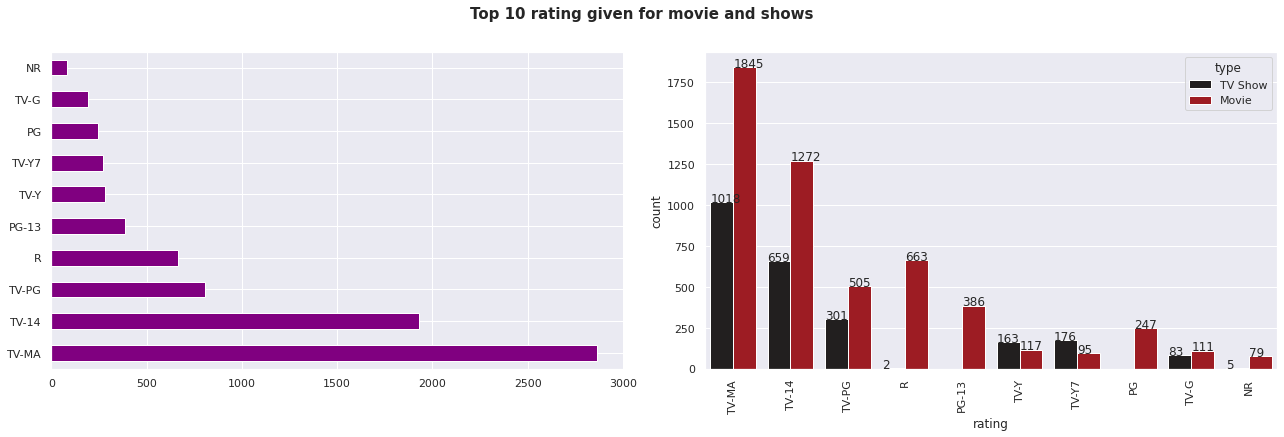

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(18,6))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', size=15, y=1.01)
sns.set(style="darkgrid")

# univariate analysis
df.rating.value_counts()[:10].plot(kind='barh', ax=ax[0],color= 'purple')

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1],palette=['#221f1f', '#b20710'])
plt.xticks(rotation=90)
for p in graph.patches:  #adding value count on the top of bar
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()


**1. Why did you pick the specific chart?**
- For analyzing the top 10 rating column.

**2. What is/are the insight(s) found from the chart?**

- Most of the movie and tv shows have rating of TV-MA (Mature Audiance) then followed by TV-14 (younger audiance).
- Highest number of rating given for the movies as compared to TV shows it is pretty obivious because of gighet number of category belong from mvoie class as  we cann seen earlier in type column.

**3. Will the gained insights help creating a positive business impact?**
- Yes. It will impact.

## **Chart-8:** Listed_In column (Gener)

In [ ]:
# seperating genre from listed_in columns for analysis purpose
genres = df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# top 10 genre in listed movie/show
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres[:10]

genre  count
0      International Movies   2437
1                    Dramas   2106
2                  Comedies   1471
3    International TV Shows   1199
4             Documentaries    786
5        Action & Adventure    721
6                 TV Dramas    704
7        Independent Movies    673
8  Children & Family Movies    532
9           Romantic Movies    531

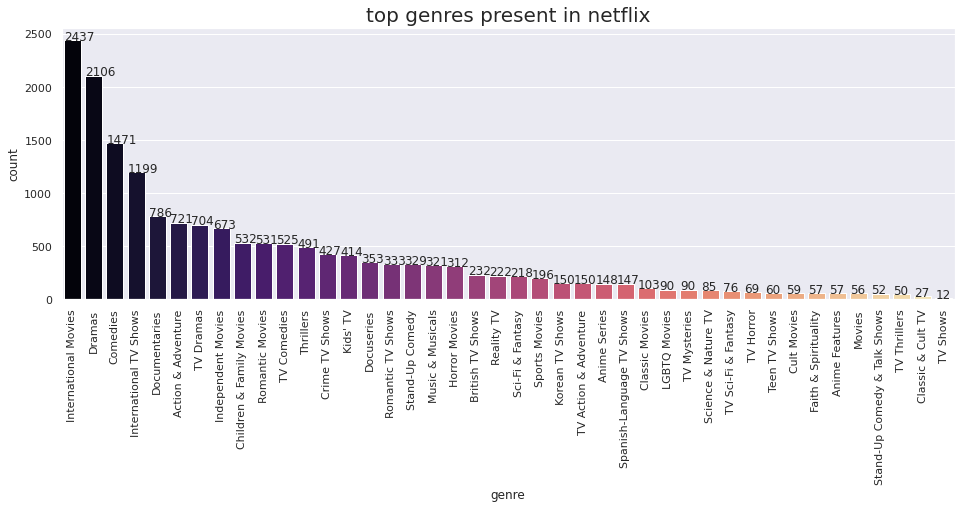

In [ ]:
# plotting graph
plt.figure(figsize=(16,5))
graph = sns.barplot(x='genre', y='count', data=genres, palette='magma')
graph.set_title('top genres present in netflix', size=20)
plt.xticks(rotation=90)

#adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.show()


**1. Why did you pick the specific chart?**
- To vizualize the top 10 genres based on their counts.

**2. What is/are the insight(s) found from the chart?**

- Highest number of genre belong from International movies, Dramas, Comedies respectively.
- Least number of  genre belong from Classic & cult TV, TV Thriller, Stand-Up comedy and Talk show.

**3. Will the gained insights help creating a positive business impact?**
- Yes. It will impact.

## **Chart-9:** Description

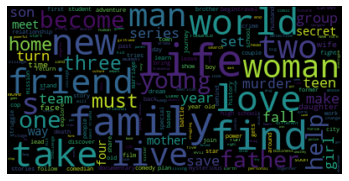

In [ ]:
# text documents
text = " ".join(word for word in df['description'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

**Observation :** 
- Most of the comman words present in description column are family, find, life, love, new, world, friend.

## **Chart-10:** Movie Duration Ditribution

In [ ]:
movie_duration = df.loc[df['type'] == 'Movie',['type','duration']] #filter movie and their length
movie_duration['duration'] = movie_duration['duration'].apply(lambda x : int(x.split()[0]))  

Text(0.5, 1.0, 'Movie Duration')

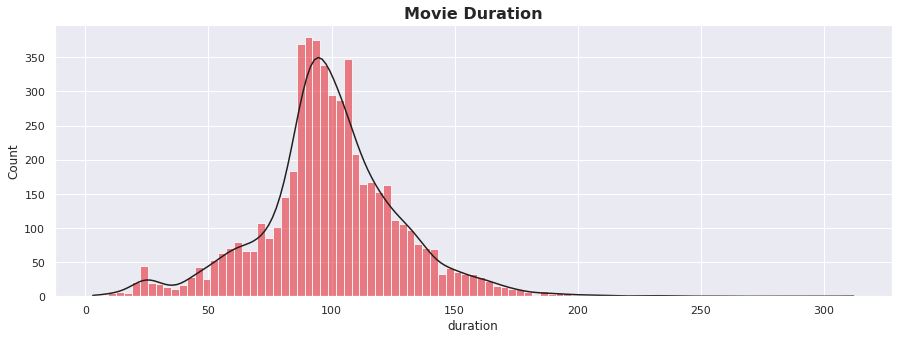

In [ ]:

#movie lenth distribution
plt.figure(figsize=(15,5))
ax = sns.histplot(x='duration',data=movie_duration,kde=True,color="#e50914")
ax.lines[0].set_color('#221f1f')
plt.title("Movie Duration",size='16',fontweight="bold")
     


**1. Why did you pick the specific chart?**
- To vizualize the Distribution of Movie duration

**2. What is/are the insight(s) found from the chart?**

- Above histogram plot, we can see that the duration for Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes which seems to make sense.
- Most content are about 70 to 120 min duration for movies.

## **Chart-11:** TV Show Seasons distribution

In [ ]:
tvshow_seasons = df.loc[df['type'] == 'TV Show',['type','duration']]                #filter tvshow and their seasons
tvshow_seasons['duration'] = tvshow_seasons['duration'].apply(lambda x : int(x.split()[0]))            #converting string into integer


tvshow_seasons['duration'].value_counts().reset_index().rename(columns={'index':'seasons','duration':'count'})     

seasons  count
0         1   1608
1         2    382
2         3    184
3         4     87
4         5     58
5         6     30
6         7     19
7         8     18
8         9      8
9        10      6
10       11      3
11       13      2
12       12      2
13       15      2
14       16      1

Text(0.5, 0, 'Seasons')

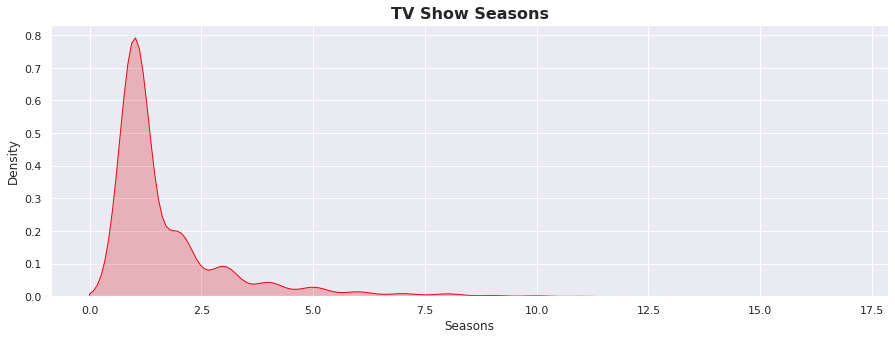

In [ ]:

#TV show seasons distribution
plt.figure(figsize=(15,5))
ax = sns.kdeplot(x='duration',data=tvshow_seasons,color="#e50914",shade=True)
# ax = sns.histplot(x='duration',data=tvshow_seasons,kde=True,color="#e50914")
# ax.lines[0].set_color('#221f1f')
plt.title("TV Show Seasons",size='16',fontweight="bold")
plt.xlabel('Seasons')


**1. Why did you pick the specific chart?**
- To vizualize the Distribution of TV Show duration

**2. What is/are the insight(s) found from the chart?**

- From above we see that Netflix TV shows on the other hand seems to be heavily skewed to the right or positively skewed where the majority of shows only have 1 season.

## **5. Data Cleaning**
- Data cleaning, also known as data cleansing, is the process of identifying and correcting or removing inaccurate, incomplete, irrelevant, corrupt, or duplicate data within a dataset. Data cleaning can involve modifying, replacing, or deleting data to ensure consistency and accuracy. Data cleaning is important for preparing data for transfer, storage, or analysis, and for making data-driven decisions
- After EDA we are perfoming data cleaning process.

## 1. Check For duplicate value

In [ ]:
# counting duplicate values
df.duplicated().sum()

0

## 2. Handling Missing Values

<AxesSubplot:>

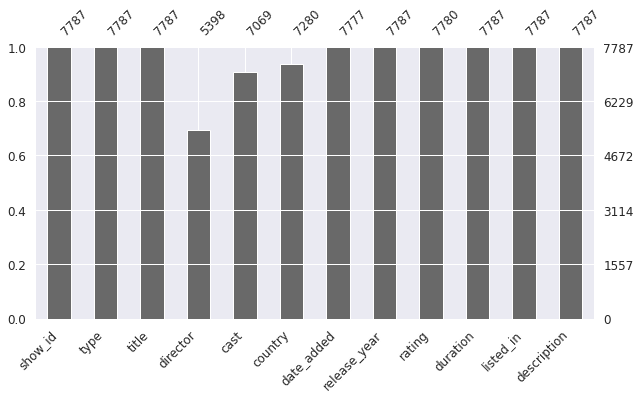

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(df, figsize=(10,5), fontsize=12)

In [ ]:
# Missing Data %
round(df.isna().sum()/len(df)*100, 2).sort_values(ascending=False)

director        30.68
cast             9.22
country          6.51
date_added       0.13
rating           0.09
show_id          0.00
type             0.00
title            0.00
release_year     0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

## **What you have done till now?**
- Checked for duplicated values and i found no duplicate values
- Checked for missing value. And found that director, cast,country, date_added, rating has the missing values.

In [ ]:
# Handling Missing Values & Missing Value Imputation
df[['director','cast','country']] = df[['director','cast','country']].fillna(' ')
df.dropna(axis=0, inplace=True)

In [ ]:
# checking for null values after treating them.
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## **what you have done and what you have observed?**
- The missing values in the director, cast, and country attributes can be replaced with 'empty string'
- Small amount of null value percentage present in rating and date_added column, if we drop these nan values it will not affect that much while building the model. So, we simply drop the nan value present in rating and date_added columns.
- Now no missing value is there after treating.

## 3. Handling Outlier

<AxesSubplot:>

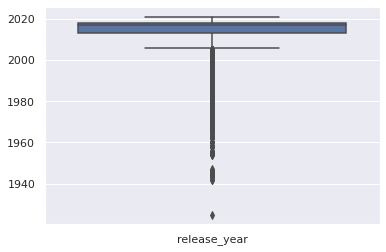

In [ ]:
# boxplot for outlier detection
sns.boxplot(data=df)

#### Is it necessary to treat outliers in clustering?
- Since, the almost all of the data present in textual format except release year.
- The data that we need to create cluster/building model are present in textual foramat. So, there is no need to perform handling outlier.

## **6. Textual Data Preprocessing**
### Modelling Approach
1. **Attrribute selection-** Select the attributes based on which you want to cluster the shows

2. **Text preprocessing:**   Remove all stopwords and punctuation marks, convert all textual data to lowercase.

3. **Stemming-**             Stemming to generate a meaningful word out of corpus of words.

4. **Tokenization-** Tokenization of corpus and Word vectorization

5. **PCA-** Dimensionality reduction

6. **Implimention of Algotithm-** Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques

7. **Visualization and word cloud-** Build optimal number of clusters and visualize the contents of each cluster using wordclouds.

## 1. Attribute Selection
We will cluster the movie/shows on Netflix based on the following attributes:

- Director
- Cast
- Country
- Rating
- Listed in (genres)
- Description

In [ ]:
# creating tags column using all text column which one is used for model building purpose.
df['tags'] = df['description'] + df['listed_in'] + df['rating'] + df['cast'] + df['country'] + df['director']

In [ ]:
df.tags[0] # First view of newly made column

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyTV-MAJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazil '

## 2. Text Preprocessing
### Removing stopwords and lowercasing

In [ ]:
# download the stop words list if it is not already downloaded
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# Funtion to remove stopwords
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words] #lowering the text
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# applying stopwords function.
df['tags'] = df['tags'].apply(stopwords)
df.tags[0]

'future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.international tv shows, tv dramas, tv sci-fi & fantasytv-majoão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschibrazil'

### **What is Stop words and why you removed from the text ?**
- Stopwords As mentioned earlier, stopwords are very common words. Words like “we”,"a," "an," "the,", "and" "is," “are” probably do not help at all in NLP tasks such as sentiment analysis or text classifications. Hence, we can remove stopwords to save computing time and efforts in processing large volumes of text.
- These words can add noise to the data and can sometimes affect the performance of NLP models, so they are often removed as a pre-processing step.

### **Why you have done lower casing ?**
- This can be particularly important for tasks like text classification, where the same word with different capitalization may be considered as separate features.
- can help reduce the size of the vocabulary used in an NLP model. This can help improve the efficiency of the model and reduce the risk of overfitting.
- Capitalization can sometimes be used for emphasis, but it doesn't generally provide any significant information for NLP tasks. Lowercasing removes this noise from the text, allowing the model to focus on the more relevant information.

## 3. Removing Punctuations

In [ ]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# applying remove_punctuation function
df['tags'] = df['tags'].apply(remove_punctuation)
df.tags[0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalorinternational tv shows tv dramas tv scifi  fantasytvmajoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibrazil'

## **Why you have Removed punctuation ?**
- Removing punctuation is a common pre-processing step in natural language processing (NLP) tasks. Punctuation marks like periods, commas, and exclamation points can add noise to the data and can sometimes be treated as separate tokens, which can affect the performance of NLP models.

## 4. Stemming

In [ ]:
from nltk.stem.snowball import SnowballStemmer

# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
# appying stemming function
df['tags'] = df['tags'].apply(stemming)
df.tags[0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalorintern tv show tv drama tv scifi fantasytvmajoão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschibrazil'

## **Why You have done stemming ?**
- Stemming is a natural language processing technique that is used to reduce words to their base form, also known as the root form. The process of stemming is used to normalize text and make it easier to process. It is an important step in text pre-processing.

## **Why You have used Snowball stemmer instead of Porter Stemmer?**
- The Snowball stemmer (also known as the Porter2 stemmer) is an improvement over the original Porter stemmer algorithm. The Snowball stemmer provides a more aggressive approach to stemming, meaning that it tends to remove more word endings than the Porter stemmer. 
- This can be beneficial in some cases because it can help to further reduce the dimensionality of the feature space and remove more of the inflectional noise in the text. The Snowball stemmer is also more flexible than the Porter stemmer because it allows for easy creation of new stemmers in other languages by using a simple rule-based approach.

## 5. Text Vectorization

In [ ]:
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(df['tags'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [ ]:
print(len(dictionary)) #number of independet features created from "tags" columns ---> max_features=10000

10000


In [ ]:
# convert vector into array form for clustering
vector = tfidf.transform(df['tags']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7770, 10000)
datatype : <class 'numpy.ndarray'>


## **Why you have used text Vectorization?**
- Word/Text vectorization is the process of representing words as numerical vectors. This is important in NLP tasks because most machine learning models expect numerical input and cannot work with raw text data directly. Word vectorization allows you to input the words into a machine learning model in a way that preserve the meaning and context of the words.
- Word vectorization can also be used to measure the similarity between words using vector arithmetic.

- We can vectorize the corpus using **TFIDF vectorizer**, where TFIDF stands for **Term Frequency Inverse Document Frequency**.

- ### TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

- ### IDF(t) = $log_e(\frac{Total\  number \ of \ documents}{ Number \  of \ documents \  with \  term \ t \ in \ it })$

## 6. PCA- For Dimensionality Reduction

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(vector)

PCA(random_state=42)

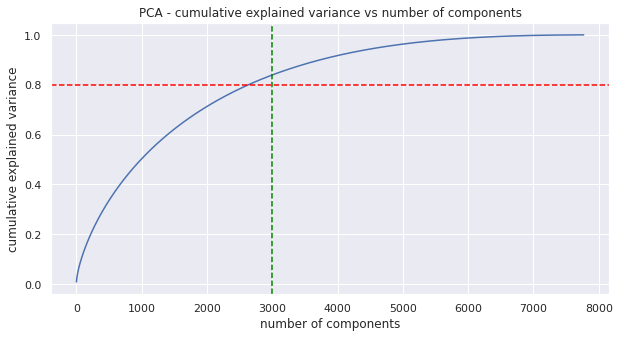

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

In [ ]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=42)
pca.fit(vector)

PCA(n_components=3000, random_state=42)

In [ ]:
# transformed features
X = pca.transform(vector)

# shape of transformed vectors
X.shape

(7770, 3000)

## **Why we have done the dimensionality Reduction**
- Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while preserving as much information as possible. It is a common step in machine learning and data analysis, as high-dimensional datasets can be difficult to work with and can sometimes suffer from the curse of dimensionality.

## **What You have done and what you have got ?**
### After PCA, we have got following insights.
- We find that 100% of the variance is explained by about ~7500 components.
- Also, more than 80% of the variance is explained just by 3000 components.
- Hence to simplify the model, and reduce dimensionality, we can take the top 3000 components, which will still be able to capture more than 80% of variance.


## **7. Implementation Clusters**

# **1. k-Means Clustering**

### 1. Elbow Method to find out the value of K.

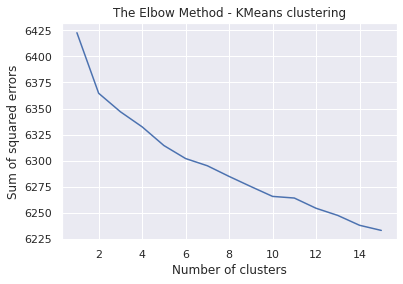

In [ ]:
'''Elbow method to find the optimal value of k'''

# Initialize a list to store the sum of squared errors for each value of k
SSE = []

for k in range(1, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the values of SSE
plt.plot(range(1, 16), SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

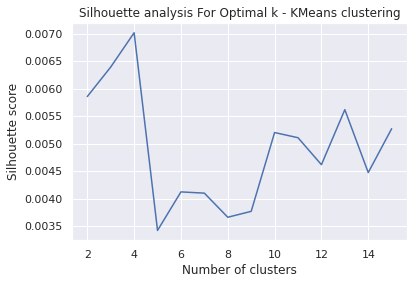

In [ ]:
'''Silhouette score method to find the optimal value of k'''

# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

for k in range(2, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # Compute the silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_avg.append(score)
  
# Plot the Silhouette analysis
plt.plot(range(2,16), silhouette_avg)
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

#### What you have done and what you have got from this?
- The Elbow Method is one of the most popular methods to determine this optimal value of k.
- From the above plot we got The highest Silhouette score is obtained for 4 clusters.

In [ ]:
# Clustering the data into 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=33)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=33)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(6332.4592429903205, 0.006983690081621605)


In [ ]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

In [ ]:
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'kmeans_cluster']]

type                                        title      director  \
7091    Movie  Tim Minchin And The Heritage Orchestra Live    Matt Askem   
7697    Movie                          Yanda Kartavya Aahe  Kedar Shinde   
337   TV Show                             Age of Rebellion      Peter Ho   
1893    Movie      Dumb and Dumberer: When Harry Met Lloyd   Troy Miller   
3695    Movie          Lock, Stock and Two Smoking Barrels   Guy Ritchie   

                                                   cast         country  \
7091                         Tim Minchin, Jules Buckley  United Kingdom   
7697  Ankush Choudhary, Smita Shewale, Mohan Joshi, ...           India   
337   Peter Ho, Jeanine Yang, Tammy Chen, Jason Tsou...          Taiwan   
1893  Eric Christian Olsen, Derek Richardson, Rachel...   United States   
3695  Jason Flemyng, Dexter Fletcher, Nick Moran, Ja...  United Kingdom   

     rating                                          listed_in  \
7091  TV-MA                  Music & Musicals, Stand-Up Comedy   
7697  TV-PG             Comedies, Dramas, International Movies   
337   TV-MA  Crime TV Shows, International TV Shows, TV Dramas   
1893  PG-13                                           Comedies   
3695      R   Action & Adventure, Comedies, Independent Movies   

                                            description  kmeans_cluster  
7091  Flanked by a full orchestra, Tim Minchin takes...               3  
7697  Thanks to an arranged marriage that was design...               1  
337   At their high school, a group of unruly teens ...               2  
1893  This wacky prequel to the 1994 blockbuster goe...               3  
3695  Hoping to make a bundle in a high-stakes poker...               3

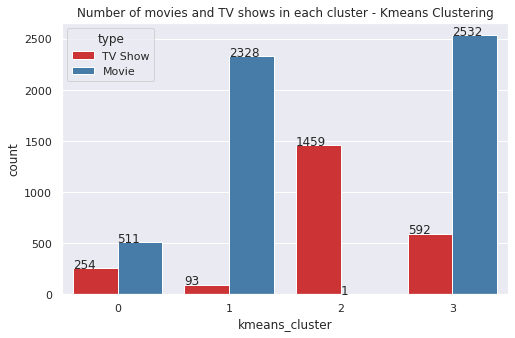

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
sns.set(style="darkgrid")
graph = sns.countplot(x='kmeans_cluster',data=df, hue='type',palette='Set1')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

### **What you have done and What you have got from this insights?**

- Implemented K means clustering and trying to find the k value by Elbow method.
- Based on the silhouette score it is concluded that the best silhouette score is when the number of cluster is 4.
- Plotted the barchart and it is seen that cluster 4 followed by cluster 3 has the heighest number of Movie and cluster number 3 has the heighest count of Tv Shows.
- Created 4 clusters succesfully

## 2. Building Word Cloud

In [ ]:
def kmeans_worldcloud(cluster_number, column_name):
  
  '''function for Building a wordcloud for the movie/shows'''

  df_wordcloud = df[['kmeans_cluster',column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster']==cluster_number]
  
  # text documents
  text = " ".join(word for word in df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)
  
  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

### **Chart-1:** Word Cloud on "description" column for different cluster

cluster 0


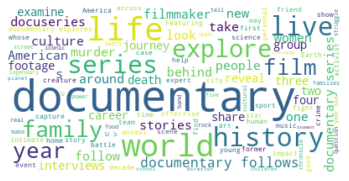

cluster 1


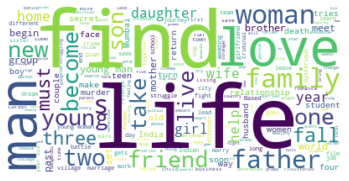

cluster 2


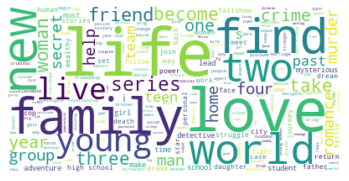

cluster 3


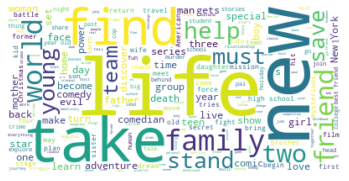

In [ ]:
for i in range(4):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'description')

### **Chart-2:** Word Cloud on "Cast" column for different cluster

cluster 0


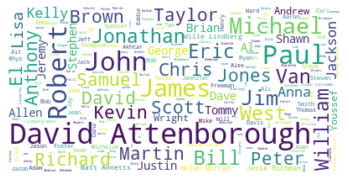

cluster 1


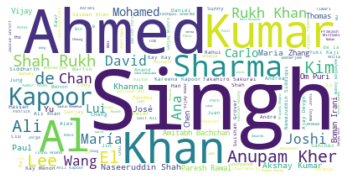

cluster 2


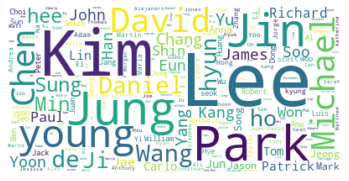

cluster 3


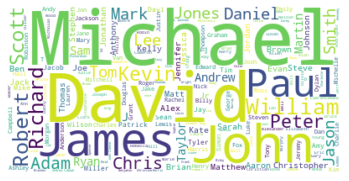

In [ ]:
for i in range(4):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'cast')

### **Chart-3:** Word Cloud on "Cast" column for different cluster

cluster 0


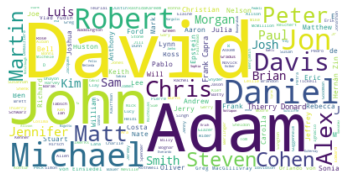

cluster 1


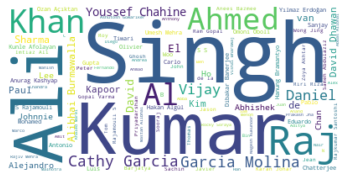

cluster 2


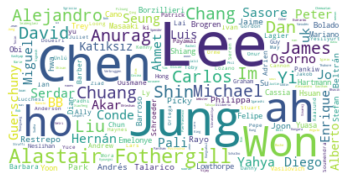

cluster 3


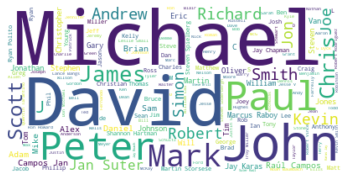

In [ ]:
for i in range(4):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'director')

### **Chart-4:** Word Cloud on "Listed_in" column for different cluster

cluster 0


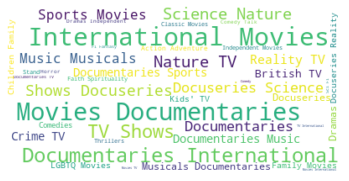

cluster 1


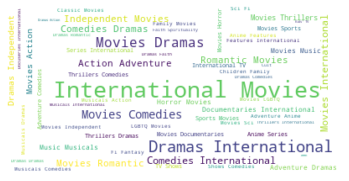

cluster 2


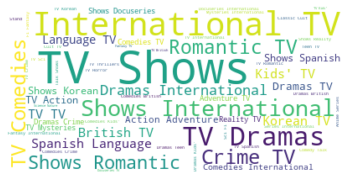

cluster 3


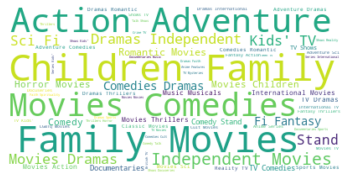

In [ ]:
for i in range(4):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'listed_in')

### **Chart-5:** Word Cloud on "Country" column for different cluster

cluster 0


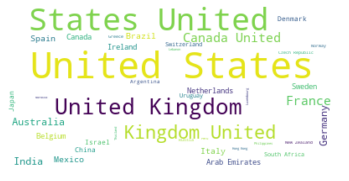

cluster 1


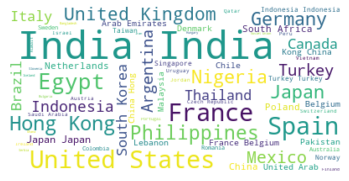

cluster 2


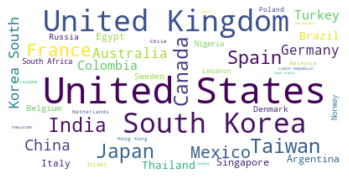

cluster 3


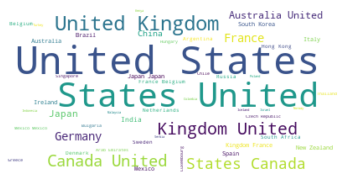

In [ ]:
for i in range(4):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'country')

### **Chart-6:** Word Cloud on "Title" column for different cluster

cluster 0


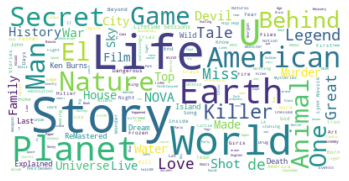

cluster 1


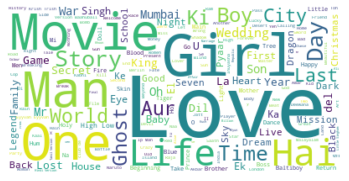

cluster 2


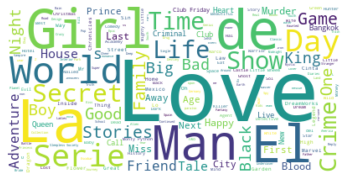

cluster 3


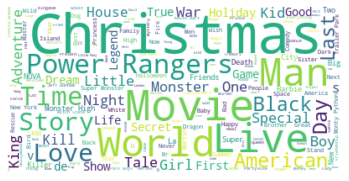

In [ ]:
for i in range(4):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'title')

# **2. Hierarchical clustering**

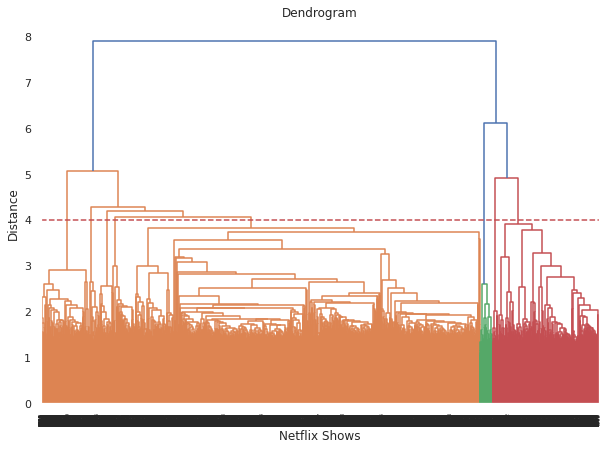

In [ ]:
# Building a dendogram to decide the number of clusters
plt.figure(figsize=(10, 7))  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4, color='r', linestyle='--')

**1. Why did ypu pick specific chart ?**
- Building clusters using the **Agglomerative (hierarchical) clustering** algorithm.

Agglomerative hierarchical clustering is a method of clustering that is used to build a hierarchy of clusters. It is a bottom-up approach, where each sample is initially treated as a single-sample cluster and clusters are merged together as they are deemed similar.

How it's work?
1. The algorithm starts by calculating the distance between all pairs of samples and storing them in a distance matrix. 
2. Then selects the two closest clusters and merges them into a single cluster.
3. Above process is repeated until all the samples are in the same cluster.

The resulting clusters form a tree-like structure called a dendrogram, which shows the relationships between the clusters at each level of the hierarchy.

**2. What is/are the insight(s) found from the chart?**
- At a distance of 4 units, 8 clusters can be built using the agglomerative clustering algorithm.



In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(X)

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'hierarchical_cluster']]

type                          title   director  \
7316  TV Show            Unauthorized Living              
3217    Movie                          Jonas  Lô Politi   
3822  TV Show                          Lupin              
2428  TV Show  Girlfriends' Guide to Divorce              
2828  TV Show             Hotel Transylvania              

                                                   cast  \
7316  José Coronado, Álex González, Claudia Traisac,...   
3217  Jesuíta Barbosa, Laura Neiva, Criolo, Ana Cecí...   
3822  Omar Sy, Ludivine Sagnier, Clotilde Hesme, Nic...   
2428  Lisa Edelstein, Beau Garrett, Necar Zadegan, P...   
2828  Bryn McAuley, Evany Rosen, Gage Munroe, Joseph...   

                    country rating  \
7316                  Spain  TV-MA   
3217                 Brazil  TV-MA   
3822          United States  TV-MA   
2428          United States  TV-MA   
2828  United States, Canada  TV-Y7   

                                              listed_in  \
7316  Crime TV Shows, International TV Shows, Spanis...   
3217                       Dramas, International Movies   
3822  Crime TV Shows, International TV Shows, TV Act...   
2428                             TV Comedies, TV Dramas   
2828                              Kids' TV, TV Comedies   

                                            description  hierarchical_cluster  
7316  When a Galician shipper and drug lord hiding h...                     0  
3217  During Carnival, two teens from different clas...                     1  
3822  Inspired by the adventures of Arsène Lupin, ge...                     1  
2428  After the world learns the truth about her fai...                     0  
2828  With her dad away, Mavis is so ready for adven...                     0

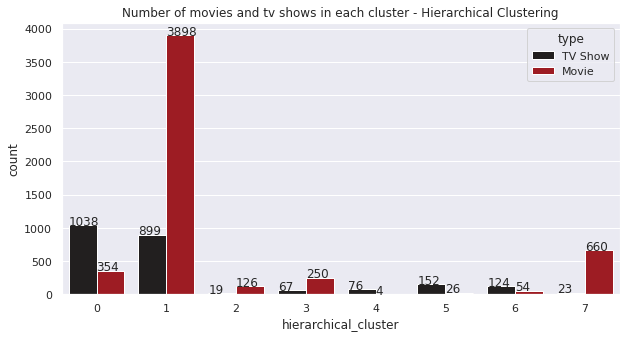

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=df, hue='type', palette=['#221f1f', '#b20710'] )
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

- Successfully Created 8 clusters using the Agglomerative (hierarchical) clustering algorithm.

## Building Word Cloud

In [ ]:
def hierarchical_worldcloud(cluster_number, column_name):
  
  '''function for Building a wordcloud for the movie/shows'''

  df_wordcloud = df[['hierarchical_cluster',column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['hierarchical_cluster']==cluster_number]
  
  # text documents
  text = " ".join(word for word in df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)
  
  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

### **Chart-1:** Word Cloud on "Title" column for different cluster

cluster 0


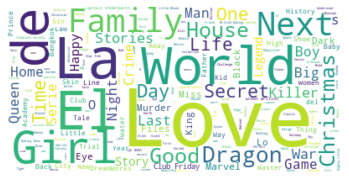

cluster 1


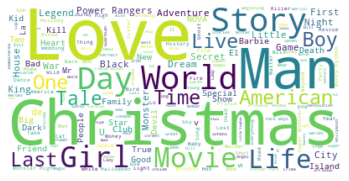

cluster 2


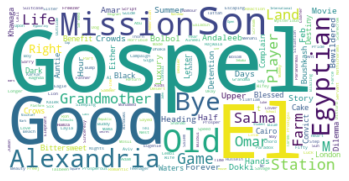

cluster 3


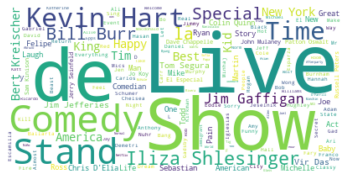

cluster 4


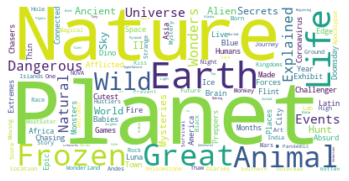

cluster 5


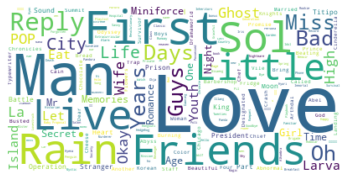

cluster 6


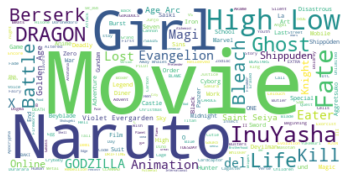

cluster 7


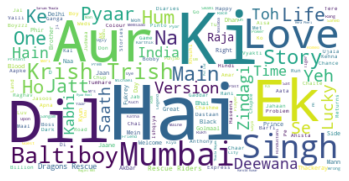

In [ ]:
for i in range(8):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'title')

### **Chart-2:** Word Cloud on "description" column for different cluster

cluster 0


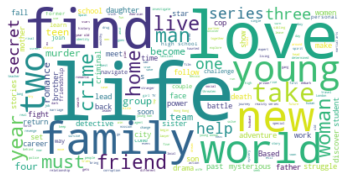

cluster 1


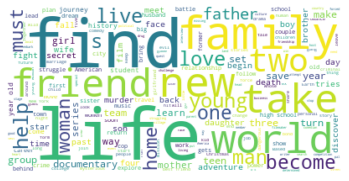

cluster 2


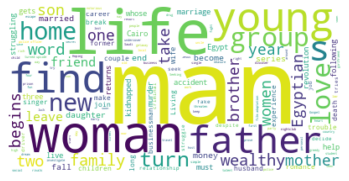

cluster 3


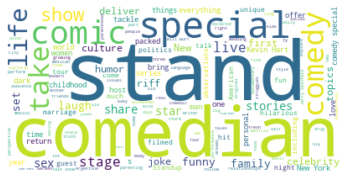

cluster 4


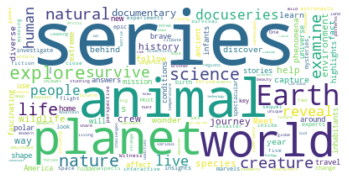

cluster 5


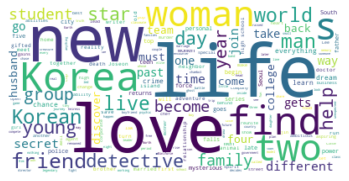

cluster 6


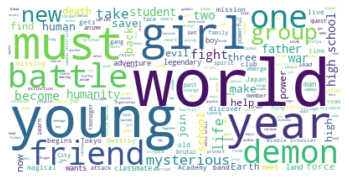

cluster 7


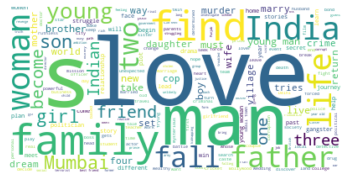

In [ ]:
for i in range(8):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'description')

### **Chart-3:** Word Cloud on "cast" column for different cluster

cluster 0


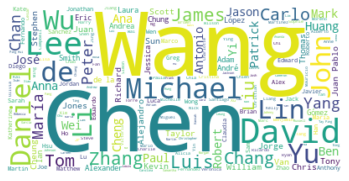

cluster 1


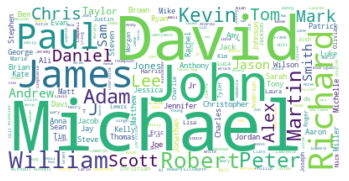

cluster 2


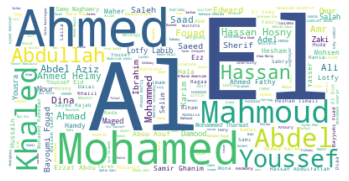

cluster 3


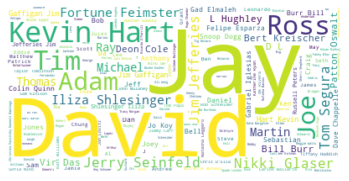

cluster 4


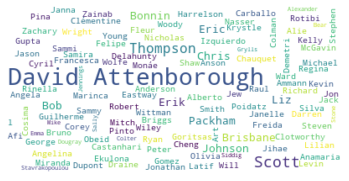

cluster 5


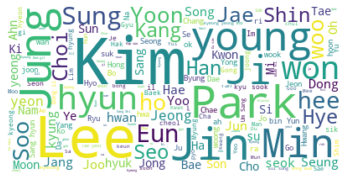

cluster 6


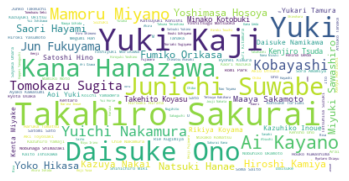

cluster 7


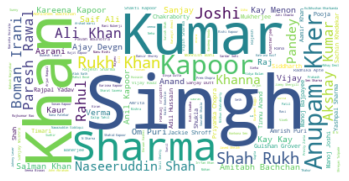

In [ ]:
for i in range(8):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'cast')

### **Chart-4:** Word Cloud on "Country" column for different cluster

cluster 0


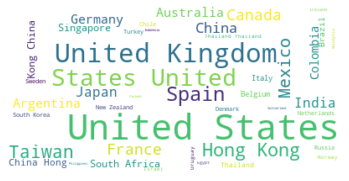

cluster 1


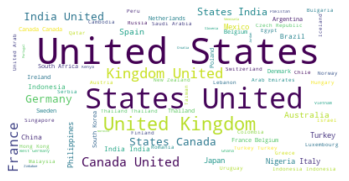

cluster 2


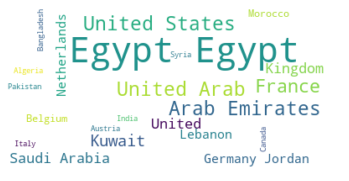

cluster 3


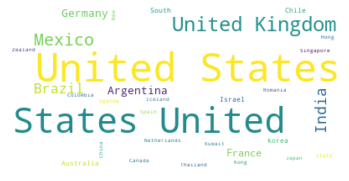

cluster 4


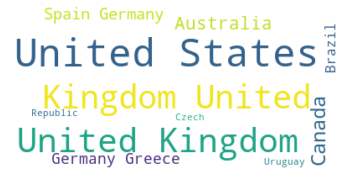

cluster 5


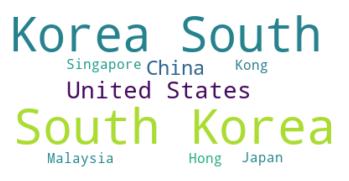

cluster 6


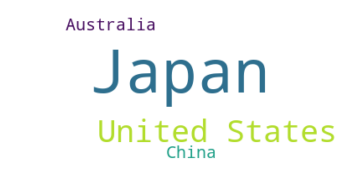

cluster 7


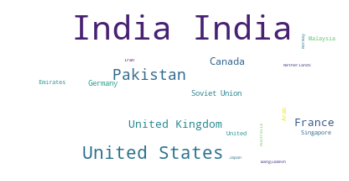

In [ ]:
for i in range(8):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'country')

### **Chart-5:** Word Cloud on "listed_in (genre)" column for different cluster

cluster 0


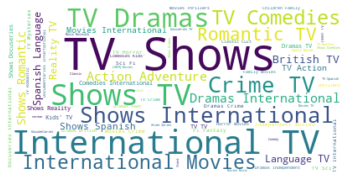

cluster 1


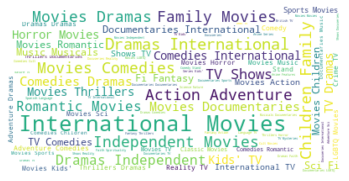

cluster 2


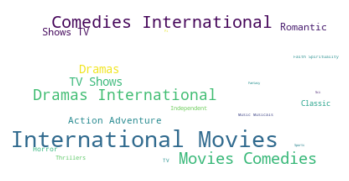

cluster 3


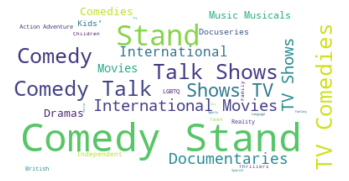

cluster 4


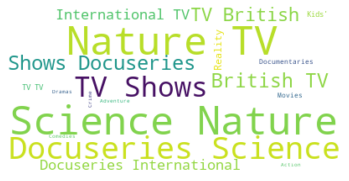

cluster 5


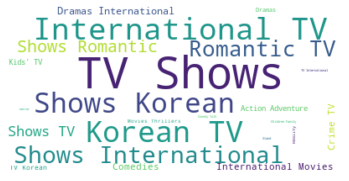

cluster 6


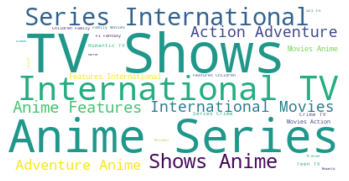

cluster 7


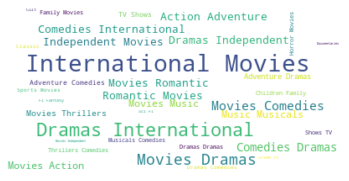

In [ ]:
for i in range(8):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'listed_in')

# **8. Content Based Recommendation System**

- A content-based recommendation system is a machine learning algorithm that gives recommendations to users based on the similarities between items and the user's preferences
Content-based recommendation systems recommend items to a user by using the similarity of items. This recommender system recommends products or items based on their description or features. It identifies the similarity between the products based on their descriptions.

- It short notes which items a particular user likes and also the items that the users with behavior and likings like him/her likes, to recommend items to that user.



- A straightforward content-based recommender system can be developed to suggest similar movies or shows to users based on their viewing history. By leveraging the power of cosine similarity, the recommender system can calculate the similarity score between different shows to generate a list of recommendations that match the user's preferences.

- When calculating the similarity score using cosine similarity, the recommender system considers the dot product of two vectors and divides it by the magnitude value. In essence, the cosine similarity score increases as the angle between the two vectors decreases. This means that shows that have similar features or characteristics will have a higher similarity score, indicating that they are more alike than dissimilar. Therefore, the recommender system can suggest similar shows to users that they are likely to enjoy based on their past viewing habits.

In [ ]:
# veryfying index
df[['show_id', 'title', 'tags']]

show_id                                    title  \
0         s1                                       3%   
1         s2                                     7:19   
2         s3                                    23:59   
3         s4                                        9   
4         s5                                       21   
...      ...                                      ...   
7782   s7783                                     Zozo   
7783   s7784                                   Zubaan   
7784   s7785                        Zulu Man in Japan   
7785   s7786                    Zumbo's Just Desserts   
7786   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                                   tags  
0     futur elit inhabit island paradis far crowd sl...  
1     devast earthquak hit mexico citi trap survivor...  
2     armi recruit found dead fellow soldier forc co...  
3     postapocalypt world ragdol robot hide fear dan...  
4     brilliant group student becom cardcount expert...  
...                                                 ...  
7782  lebanon civil war depriv zozo famili hes left ...  
7783  scrappi poor boy worm way tycoon dysfunct fami...  
7784  documentari south african rapper nasti c hit s...  
7785  dessert wizard adriano zumbo look next “willi ...  
7786  documentari delv mystiqu behind bluesrock trio...  

[7770 rows x 3 columns]

- As you can see above dataframe there are total 7770 rows present in our dataframe and it show last index as 7786 because of dropping some of the rows while treating null values.

- In order to build content based recommendation system we find out similarity score on the basis of specific index_id with respect to that specific "tags" column.

- If we can't reset the index there is highly chances that we calculate cosine similarity for another one index instead of that we provide index. In order to avoid this problem and address index properly while building recommandation system. We simply reset the index.

In [ ]:
# defining new dataframe for building recommandation system
recommender_df = df.copy()

# reseting index
recommender_df.reset_index(inplace=True)

# checking whether or not reset index properly 
recommender_df[['show_id', 'title', 'tags']]

show_id                                    title  \
0         s1                                       3%   
1         s2                                     7:19   
2         s3                                    23:59   
3         s4                                        9   
4         s5                                       21   
...      ...                                      ...   
7765   s7783                                     Zozo   
7766   s7784                                   Zubaan   
7767   s7785                        Zulu Man in Japan   
7768   s7786                    Zumbo's Just Desserts   
7769   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                                   tags  
0     futur elit inhabit island paradis far crowd sl...  
1     devast earthquak hit mexico citi trap survivor...  
2     armi recruit found dead fellow soldier forc co...  
3     postapocalypt world ragdol robot hide fear dan...  
4     brilliant group student becom cardcount expert...  
...                                                 ...  
7765  lebanon civil war depriv zozo famili hes left ...  
7766  scrappi poor boy worm way tycoon dysfunct fami...  
7767  documentari south african rapper nasti c hit s...  
7768  dessert wizard adriano zumbo look next “willi ...  
7769  documentari delv mystiqu behind bluesrock trio...  

[7770 rows x 3 columns]

In [ ]:
# dropping show-id and index column
recommender_df.drop(columns=['index', 'show_id'], inplace=True)

In [ ]:
print(f"before reset index id for movie 'Zero' : {df[df['title'] == 'Zero'].index[0]}")  # index[0] --> to locate index position
print(f"after reset index id for movie 'Zero': {recommender_df[recommender_df['title'] == 'Zero'].index[0]}")

before reset index id for movie 'Zero' : 7764
after reset index id for movie 'Zero': 7747


In [ ]:
# calling out transformed array independent features created from tags(cluster) column after performing PCA for dimenssionality reduction.
X

array([[ 1.64742233e-01, -1.87656227e-04,  5.34957932e-03, ...,
         3.21805475e-03, -2.37843253e-03,  1.43486150e-03],
       [-4.39211529e-02, -1.25624310e-02, -1.14067417e-02, ...,
         4.42031263e-03, -5.48633111e-03, -5.06905298e-03],
       [-4.18023740e-02, -4.18474761e-02,  4.23545914e-02, ...,
         1.32716291e-02, -5.91061372e-03,  7.15299305e-03],
       ...,
       [-7.27563432e-02, -1.75690663e-02, -7.36613874e-02, ...,
        -1.07700913e-02, -2.53430787e-04,  4.74182926e-03],
       [ 6.92416158e-02,  3.69103997e-02, -2.52567717e-02, ...,
         9.32767446e-03,  7.73733927e-03,  3.84605549e-03],
       [-6.17251715e-02,  1.90419151e-01, -1.53007985e-01, ...,
        -4.64369218e-04,  7.56260249e-03,  6.70269199e-03]])

In [ ]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.        ,  0.08945623,  0.02255733, ..., -0.02361476,
         0.01043316, -0.02217486],
       [ 0.08945623,  1.        , -0.00317204, ...,  0.07223616,
        -0.01077566, -0.01049545],
       [ 0.02255733, -0.00317204,  1.        , ...,  0.00100078,
        -0.01026568, -0.01375445],
       ...,
       [-0.02361476,  0.07223616,  0.00100078, ...,  1.        ,
        -0.01545593,  0.05421083],
       [ 0.01043316, -0.01077566, -0.01026568, ..., -0.01545593,
         1.        ,  0.04236113],
       [-0.02217486, -0.01049545, -0.01375445, ...,  0.05421083,
         0.04236113,  1.        ]])

#### Function for list down top 10 recommended movie on the basis of cosine similarity score.

In [ ]:
def recommend(movie):
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = recommender_df[recommender_df['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])
    
    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(df.iloc[i[0]].title)

In [ ]:
recommend('Phir Hera Pheri')

If you liked 'Phir Hera Pheri', you may also enjoy: 

Bhool Bhulaiyaa
Thank You
Golmaal: Fun Unlimited
Chup Chup Ke
Bhagam Bhag
Ready
Khushi
Life in a ... Metro
Hattrick
Hasee Toh Phasee


In [178]:
recommend('Hum Saath-Saath Hain')

If you liked 'Hum Saath-Saath Hain', you may also enjoy: 

Together For Eternity
Hum Aapke Hain Koun
Maine Pyar Kiya
Once Upon a Time in Mumbai Dobaara!
Chal Mere Bhai
Duplicate
Dil Chahta Hai
Judwaa
Hamara Dil Aapke Paas Hai
Aashik Awara


In [180]:
recommend('Golmaal Returns')

If you liked 'Golmaal Returns', you may also enjoy: 

Golmaal: Fun Unlimited
Gori Tere Pyaar Mein
No Entry
C Kkompany
Jab We Met
Fida
Maine Pyaar Kyun Kiya
Poster Boys
Bewafaa
Paying Guests


In [182]:
recommend('Kabir Singh')

If you liked 'Kabir Singh', you may also enjoy: 

Bombairiya
Fitoor
Raja Hindustani
Rustom
Maska
Delhi Crime
AK vs AK
Guilty
Lust Stories
Socha Na Tha


In [183]:
recommend('Don')

If you liked 'Don', you may also enjoy: 

Don 2
Om Shanti Om
Happy New Year
Darna Mana Hai
Ek Main Aur Ekk Tu
We Are Family
Alarmoty in the Land of Fire
Luck by Chance
Dil Dhadakne Do
Krishna Cottage


# **9. Conclusion**

In this project, we worked on a text clustering problem wherein we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.
- The dataset contained about 7787 records, and 11 attributes.
We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).
- It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States.
- It was decided to **cluster the data based on the attributes: director, cast, country, genre, rating and description**. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.
- Through **TFIDF Vectorization, we created a total of 10000 attributes**.
- We used **Principal Component Analysis (PCA) to handle the curse of dimensionality**. **3000 components were able to capture more than 80% of variance**, and hence, the number of components were restricted to 3000.
- We first built clusters using the **K-Means Clustering** algorithm, and the **optimal number of clusters came out to be 4**. This was obtained through the **elbow method and Silhouette score** analysis.
- Then clusters were built using the **Agglomerative clustering** algorithm, and the **optimal number of clusters came out to be 8**. This was obtained after visualizing the **dendrogram**.
- A **content based recommender system** was built using the similarity matrix obtained after using **cosine similarity**. This recommender system will make 5 recommendations to the user based on the type of show they watched.

# **_Hurrah! We have successfully completed your Machine Learning Capstone Project !!!_**